In [1]:
import random

import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a function to load the arrays from the file
def load_arrays_from_file(filename):
    with open(filename, 'r') as file:
        data = file.read().strip().split('\n')  # Read file and split by newline
    
    arrays = []
    for line in data:
        # Convert the string of numbers into a numpy array
        array = np.array([int(x) for x in line.split()])
        arrays.append(array)
    
    return arrays

# Load the arrays
arrays = load_arrays_from_file('hopfield-clean.seq')

In [3]:
len(arrays)

360

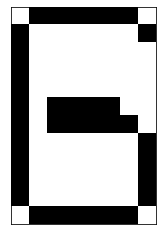

In [4]:
# Define the array
# data = np.array([
#     -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 
#     -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1,
#     1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 
#     -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1,
#     1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 
#     -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1,
#     1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 
#     -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1
# ])

data = random.choice(arrays)
# Reshape to 8x12
data = data.reshape(12, 8)

# Create a colormap for -1 as white and 1 as black
cmap = plt.cm.gray
norm = plt.Normalize(vmin=-1, vmax=1)

# Plot the figure
plt.figure(figsize=(6, 4))
plt.imshow(data, cmap=plt.cm.gray_r, norm=norm)
plt.xticks([])  # No ticks on x axis
plt.yticks([])  # No ticks on y axis
plt.grid(False)
plt.show()

In [5]:
t = np.array(arrays).T
# Assuming t is an SxQ matrix (2D array)
S, Q = t.shape
print(S, Q)
W = np.zeros((S, S))

for k in range(Q):
    W += (1/Q) * np.outer(t[:, k], t[:, k])

# Zeroing the diagonal
np.fill_diagonal(W, 0)

# Placeholder for CY
CY = []

# This function approximates the behavior of the MATLAB satlins function 
# (saturating linear transfer) using np.clip().
def satlins(x):
    return np.clip(x, 0, 1)

# Iterating over each column of t
for k in range(Q):
    u = t[:, k]
    uu = t[:, k]
    while np.linalg.norm(satlins(W @ u) - u) > 0:
        u = satlins(W @ u)
    #print('clip', uu, '->', u)
    CY.append(u)

CY = np.array(CY).T  # Convert list of arrays to 2D array

# Prepare alld array
space = 2
n_copies = 30
n_classes = 12
digit_height = 12
digit_width = 8
alld = np.zeros(
    (n_classes * (digit_height + space) - space, 
    n_copies * (digit_width + space) - space))
print(alld.shape)

96 360
(166, 298)


In [7]:
tt = np.array(CY).T
tt.shape
tt[0].reshape(12, 8)

array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.        , 0.        ],
       [0.        , 0.37142857, 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.77142857],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.      

In [8]:
for k in range(Q):
    u = t[:, k]
    print(k, u)

0 [-1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1]
1 [-1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1]
2 [-1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1]
3 [-1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 

In [9]:
print(Q, S)
print(tt.shape)

360 96
(360, 96)


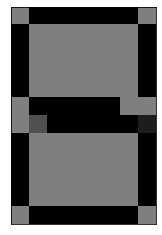

In [11]:
tt = np.array(CY)
test = tt[:, 80].reshape(12, 8)
# test = CY[:,80].reshape(12, 8)

# Create a colormap for -1 as white and 1 as black
norm = plt.Normalize(vmin=-1, vmax=1)

# Plot the figure
plt.figure(figsize=(6, 4))
plt.imshow(test, cmap=plt.cm.gray_r, norm=norm)
plt.xticks([])  # No ticks on x axis
plt.yticks([])  # No ticks on y axis
plt.grid(False)
plt.show()

In [12]:
for p in range(40):
    otv = np.zeros((12, 8))
    ot = CY[:, p]
    for n in range(S):
        otv[n // 8, n % 8] = ot[n]
    print(otv)

[[0.         1.         1.         1.         1.         1.
  1.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         1.        ]
 [1.         0.         0.         0.         0.         0.
  0.         1.        ]
 [1.         0.         0.         0.         0.         0.
  0.         1.        ]
 [1.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.         1.         1.         1.         1.         1.
  0.         0.        ]
 [0.         0.37142857 1.         1.         1.         1.
  1.         0.77142857]
 [1.         0.         0.         0.         0.         0.
  0.         1.        ]
 [1.         0.         0.         0.         0.         0.
  0.         1.        ]
 [1.         0.         0.         0.         0.         0.
  0.         1.        ]
 [1.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.         1.         1.         1.         1.         1.
  1. 

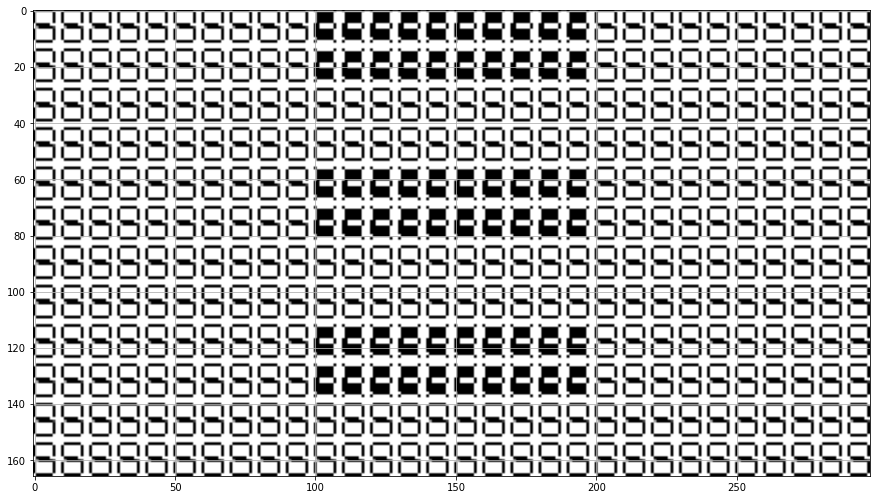

In [13]:
for p in range(Q):
    otv = np.zeros((12, 8))
    ot = CY[:, p]
    for n in range(S):
        otv[n // 8, n % 8] = ot[n]

    x = (p % n_copies) * space
    y = (p // n_copies) * space
    a = slice(
        (p // n_copies) * digit_height + y, 
        (p // n_copies + 1) * digit_height + y)
    b = slice(
        x + (p % n_copies) * digit_width, 
        x + (p % n_copies + 1) * digit_width)
    alld[a, b] = otv

# Plotting the results
fig, ax = plt.subplots(figsize=(15, 15))
# cmap = plt.cm.get_cmap('gray')
ax.imshow(alld, cmap=plt.cm.gray_r)
ax.grid(True)

plt.show()

In [15]:
# https://github.com/takyamamoto/Hopfield-Network/tree/master

import matplotlib.cm as cm

class HopfieldNetwork(object):      
    def train_weights(self, train_data):
        print("Start to train weights...")
        num_data =  len(train_data)
        self.num_neuron = train_data[0].shape[0]
        
        # initialize weights
        W = np.zeros((self.num_neuron, self.num_neuron))
        rho = np.sum([np.sum(t) for t in train_data]) / (num_data*self.num_neuron)
        
        # Hebb rule
        for i in range(num_data):
            t = train_data[i] - rho
            W += np.outer(t, t)
        
        # Make diagonal element of W into 0
        diagW = np.diag(np.diag(W))
        W = W - diagW
        W /= num_data
        
        self.W = W 
    
    def predict(self, data, num_iter=20, threshold=0, asyn=False):
        print("Start to predict...")
        self.num_iter = num_iter
        self.threshold = threshold
        self.asyn = asyn
        
        # Copy to avoid call by reference 
        copied_data = np.copy(data)
        
        # Define predict list
        predicted = []
        for i in range(len(data)):
            predicted.append(self._run(copied_data[i]))
        return predicted
    
    def _run(self, init_s):
        if self.asyn==False:
            """
            Synchronous update
            """
            # Compute initial state energy
            s = init_s

            e = self.energy(s)
            
            # Iteration
            for i in range(self.num_iter):
                # Update s
                s = np.sign(self.W @ s - self.threshold)
                # Compute new state energy
                e_new = self.energy(s)
                
                # s is converged
                if e == e_new:
                    return s
                # Update energy
                e = e_new
            return s
        else:
            """
            Asynchronous update
            """
            # Compute initial state energy
            s = init_s
            e = self.energy(s)
            
            # Iteration
            for i in range(self.num_iter):
                for j in range(100):
                    # Select random neuron
                    idx = np.random.randint(0, self.num_neuron) 
                    # Update s
                    s[idx] = np.sign(self.W[idx].T @ s - self.threshold)
                
                # Compute new state energy
                e_new = self.energy(s)
                
                # s is converged
                if e == e_new:
                    return s
                # Update energy
                e = e_new
            return s
    
    
    def energy(self, s):
        return -0.5 * s @ self.W @ s + np.sum(s * self.threshold)

    def plot_weights(self):
        plt.figure(figsize=(6, 5))
        w_mat = plt.imshow(self.W, cmap=cm.coolwarm)
        plt.colorbar(w_mat)
        plt.title("Network Weights")
        plt.tight_layout()
        plt.savefig("weights.png")
        plt.show()
        

In [16]:
model = HopfieldNetwork()
model.train_weights(arrays)

Start to train weights...


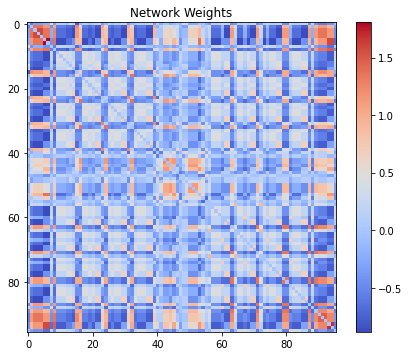

In [17]:
model.plot_weights()